<a href="https://colab.research.google.com/github/perlacueto/Feeling_Analysis/blob/main/Clasificador_Sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cargar Bibliotecas y Variables:


*  Se debe adaptar la ruta de las carpetas que contienen los modelos de la red neuronal y de archivos para preprocesamiento
*   Se debe dar acceso a los archivos del drive




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
!pip install pad_sequences

  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10199 sha256=c849a2af140b49f5e65e02dc5079de73310b9130caabea3a4df8580e4e1d743d
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad_sequences


In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
from nltk.util import pad_sequence
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
#xgboost
# Keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
#from nltk.stem import WordNetLemmatizer

# Word2vec
import gensim
from gensim.models import Word2Vec


# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

#plot
import seaborn
seaborn.set(style='whitegrid')

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
#from nltk.stem import WordNetLemmatizer

#Replace all non alphabets
from unidecode import unidecode

#For lematization
import spacy

In [ ]:
DATASET_ENCODING = "ISO-8859-1"

SEQUENCE_LENGTH = 600

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.45, 0.65)

# EXPORT
KERAS_MODEL2 = "/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/model2.h5"
WORD2VEC_MODEL2 = "/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/model2.w2v"
TOKENIZER_MODEL2 = "/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/tokenizer2.pkl"
ENCODER_MODEL2 = "/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/encoder2.pkl"

#Preprocess
dic_emoji = '/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/dic_emoji.xlsx'
lematizador = '/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/extension_lematizador.txt'
extend_stop_words = '/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/extension_stopwords.txt'

## Cargar Modelos
No se debe hacer ninguna modificación

In [ ]:
w2v_model = Word2Vec.load(WORD2VEC_MODEL2)

In [ ]:
file = open(ENCODER_MODEL2,'rb')
file.seek(0)
tokenizer = pickle.load(file)
file.close()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
with open(TOKENIZER_MODEL2, 'rb') as handle:
    tokenizer = pickle.load(handle)
tokenizer

Debe aparecer: <keras_preprocessing.text.Tokenizer at ...>

In [ ]:
model = load_model(KERAS_MODEL2)

In [ ]:
def decode_sentiment(score, include_neutral):
    if include_neutral:
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [ ]:
def predict(text, include_neutral= False):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}

## Cargar herramientas de preprocesamiento
No se debe hacer ninguna modificación

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = stopwords.words("spanish")
stemmer = SnowballStemmer("spanish")#extrae la raíz de una palabra
!spacy download es
lematiza = spacy.load("es_core_news_sm")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 34.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
extend_stopword = []
with open(extend_stop_words, 'r')as copiar:
    aux_stop = list(copiar.readlines())
copiar.close()
for palabra in aux_stop:
    aux = re.sub("\n","",palabra)
    extend_stopword.append(aux)
extend_stopword

['me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'nor',
 'not',
 'only'

In [ ]:
stop_words.extend(extend_stopword)

In [ ]:
elimina = ['no','estado','sin','como']
stop_words = [x for x in stop_words if x  not in elimina]

In [ ]:
emojis = pd.read_excel(dic_emoji)
emojis.set_index('emoji',inplace=True)
emojis = emojis.to_dict()
emojis = emojis['equivale']
print(emojis)

{'😈': 'diablo', '😀': 'sonrisa', '😍': 'encantar', '😄': 'sonrisa', '😂': 'risa', '😉': 'guiño', '😊': 'sonrisa', '🤣': 'risa', '😘': 'beso', '🤡': 'payaso', '👻': 'fantasma', '😆': 'burla', '🥰': 'encantar', '😻': 'encantar', '😋': 'feliz', '😒': 'desagradar', '😓': 'desagradar', '😔': 'triste', '😖': 'triste', '😚': 'beso', '🏦': 'banco', '😜': 'burla', '😝': 'burla', '😞': 'triste', '😠': 'enojo', '😡': 'enojo', '😢': 'triste', '😣': 'frustracion', '😤': 'enojo', '😥': 'preocupacion', '😩': 'frustracion', '😪': 'triste', '😭': 'triste', '😫': 'frustracion', '😰': 'preocupacion', '😳': 'sonrojado', '😸': 'risa', '😹': 'risa', '😺': 'risa', '😿': 'triste', '🙅': 'bloqueo', '🙏': 'rezar', '❤': 'corazon', '👍': 'bien', '👎': 'mal', '👏': 'aplauso', '👪': 'familia', '👿': 'enojado', '💩': 'mierda', '💪': 'fuerza', '😐': 'neutral', '😑': 'serio', '😕': 'confundido', '😟': 'preocupacion', '😧': 'preocupacion', '🌞': 'sol', '🇻🇪': 'venezuela', '😨': 'miedo', '😱': 'miedo', ':)': 'sonrisa', '💜': 'corazon', '💝': 'regalo', '🚗': 'carro', '🚕': 'taxi',

In [ ]:
with open(lematizador) as f:
    palabras = dict(i.rstrip().split(None, 1) for i in f)
print(len(palabras))

4698


In [ ]:
palabras.keys()

dict_keys(['aunentaron', 'aa+-o', 'aa+-os', 'aaperturar', 'abandonen', 'abdv', 'abemos', 'aberracion', 'abiertamarte', 'abiertas', 'abil', 'abilitar', 'abitacional', 'abitos', 'ablar', 'ablarme', 'abogados', 'abrazocuir', 'abrazos', 'abre', 'abriendo', 'abrira', 'abriram', 'abrirban', 'abrircuenta', 'abrirda', 'abrirdar', 'abrirdo', 'abrire', 'abririr', 'abrirla', 'abrirme', 'abrirn', 'abriro', 'abrirpor', 'abrirr', 'abrirsic', 'abriruna', 'abrirzo', 'abrupreguntar', 'absurdo', 'abundarcia', 'acababa', 'acabado', 'acabar', 'accder', 'acceda', 'accede', 'acceder', 'accederr', 'accesaba', 'accesar', 'accesible', 'acceso', 'accesos', 'acechu', 'acelerada', 'aceleren', 'acepreguntarmar', 'acepreguntarr', 'acepreguntars', 'acepreguntarste', 'aceptaran', 'acer', 'acercarse', 'acercostos', 'acerme', 'acienda', 'ackeado', 'ackear', 'acker', 'aclara', 'aclaracion', 'aclares', 'aclote', 'acojes', 'acomodidadr', 'acomodidadrr', 'acompaa+-ado', 'acompanadaos', 'acompanamar', 'acompanar', 'acompano

In [ ]:
def preprocess(tweet, stem=False):

    # Create Lemmatizer and Stemmer.
    #wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    #sequencePattern   = r"(.)\1+"
    sequencePattern   = r"(.)\1\1+"
    #seqReplacePattern = r"\1\1"
    seqReplacePattern = r"\1"

    tweet = str(tweet).lower()

    # Replace all URls with 'URL'
    tweet = re.sub(urlPattern,' url',tweet)
    # Replace all emojis.
    for emoji in emojis.keys():
      tweet = tweet.replace(emoji, " emoji " + emojis[emoji]+" ")
    # Replace @USERNAME to 'USER'.
    tweet = re.sub(userPattern,'', tweet)
    # Replace all non alphabets.
    tweet = re.findall(r'[a-z]\w+', tweet)
    tweet = " ".join(tweet)
    tweet = unidecode(tweet)
    # Replace 3 or more consecutive letters by 2 letter.
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    #Lematiza
    tweet = lematiza(tweet)
    lemmas = [tok.lemma_.lower() for tok in tweet]


    tokens = []
    for token in lemmas:
          # Checking if the word is a stopword.
          if token not in stop_words:
            for palabra in palabras.keys():
              tok = token.replace(palabra, palabras[palabra])
            #cheching if word has more than one letter
            if len(tok)>1:
              if stem:
                tokens.append(stemmer.stem(tok))
              else:
                if tok not in stop_words:
                  tokens.append(tok)
    return " ".join(tokens)



In [ ]:
def Cambiar_pagina(x):
    x = x.lower()
    x = x.replace('paginar','pagina')
    return x

In [ ]:
def agregar_columnas(comentarios):
  comentarios = comentarios.assign(text_process=np.nan) #para texto lematizado
  comentarios = comentarios.assign(new_target=np.nan) #para clasificación
  comentarios = comentarios.assign(score=np.nan) #para score
  comentarios.head()
  return(comentarios)

In [ ]:
def procesar_texto(comentarios):
  comentarios.text_process = comentarios.text.apply(lambda x: preprocess(str(x)))
  return(comentarios)

In [ ]:
def clasificar_texto(comentarios, include_neutral):
  comentarios.score = comentarios.text_process.apply(lambda x: predict(x,include_neutral)['score'])
  comentarios.new_target = comentarios.text_process.apply(lambda x: predict(x,include_neutral)['label'])
  comentarios.head()
  return comentarios

In [ ]:
def agrega_procesa_clasifica(comentarios,include_neutral):
  comentarios = agregar_columnas(comentarios)
  comentarios = procesar_texto(comentarios)
  comentarios = clasificar_texto(comentarios,include_neutral)
  return comentarios

## Prueba individual de comentario

In [ ]:
preprocess('ellos tienen buenos productos')

'tener buen producto'

In [ ]:
predict(preprocess('ellos tienen buenos productos'),)

1/1 [==============================] - 0s 54ms/step


{'label': 'POSITIVE',
 'score': 0.636762261390686,
 'elapsed_time': 0.09530282020568848}

## Procesa tabla de comentarios
*   Modifica la dirección de la tabla que contiene el texto que desees clasificar.
*   Escoge la celda de código dependiendo de si es Excel o .csv.
*   Definir las fechas límite
*   La tabla debe tener una columna llamada **text**, los comentarios contenidos en ella serán los que se clasifiquen
*   Se debe escoger el modo de clasificación.


In [ ]:
#Cargar tabla de comentarios
#CSV
df = pd.read_csv('/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/Comentarios_banesco.csv')
df['date'] = df['date'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Unnamed: 0             2297 non-null   int64              
 1   type                   2297 non-null   object             
 2   username               2297 non-null   object             
 3   text                   2297 non-null   object             
 4   date                   2297 non-null   datetime64[ns, UTC]
 5   likes                  2297 non-null   int64              
 6   post_url               2297 non-null   object             
 7   post_typename          0 non-null      float64            
 8   post_caption_hashtags  62 non-null     object             
 9   post_comments          62 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 179.6+ KB


In [ ]:
# Definir las fechas límite de período de estudio

fecha_desde = pd.to_datetime('2023-09-01 00:00:00', format='%Y-%m-%d %H:%M:%S').tz_localize('UTC')
fecha_hasta = pd.to_datetime('2023-09-30 23:59:59', format='%Y-%m-%d %H:%M:%S').tz_localize('UTC')
df = df.loc[(df['date'] >= fecha_desde) & (df['date'] <= fecha_hasta)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 10 to 2214
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Unnamed: 0             1032 non-null   int64              
 1   type                   1032 non-null   object             
 2   username               1032 non-null   object             
 3   text                   1032 non-null   object             
 4   date                   1032 non-null   datetime64[ns, UTC]
 5   likes                  1032 non-null   int64              
 6   post_url               1032 non-null   object             
 7   post_typename          0 non-null      float64            
 8   post_caption_hashtags  14 non-null     object             
 9   post_comments          14 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 88.7+ KB


In [ ]:
#EXCEL
#df = pd.read_excel('/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/mercantil banco_twitterOct0623toAug1723.xlsx')
#print(df.info())
#fecha_desde = pd.to_datetime('2023-08-23 00:00:00', format='%Y-%m-%d %H:%M:%S')
#fecha_hasta = pd.to_datetime('2023-09-30 23:59:59', format='%Y-%m-%d %H:%M:%S')
#df = df.loc[(df['date'] >= fecha_desde) & (df['date'] <= fecha_hasta)]
#df.info()

Standard: La columna de comentarios a clasificar debe llamarse 'text'...

El algoritmo agregará columnas que tendrán la clasificación del sentimiento: Target y Score, con un
llamado a procesar y clasificar. Debería especificar el modo, si no lo haces por defecto clasificará de manera binaria:
*   True para incluir Neutral
*   False para usar solo Positive/Negative



In [ ]:
df = agrega_procesa_clasifica(df, True) #Escribe el modo

1/1 [==============================] - 0s 55ms/step


## Revisa tabla final
No es necesario hacer modificaciones

In [ ]:
df[['text_process','new_target','score']].tail()

,text_process,new_target,score
1937,buena cuanto esperar aprobar apertura cuenta t...,NEGATIVE,0.252079
2196,facilitar acceso cuenta bancario encontrar fie...,POSITIVE,0.743821
2197,holar ingresar cuenta banesconline realizar re...,NEUTRAL,0.588101
2213,tener mismo problema decir sesion iniciado no ...,NEGATIVE,0.051341
2214,eliminar atender tener mismo problema,NEUTRAL,0.494286


Text(0.5, 1.0, 'Dataset labels distribuition')

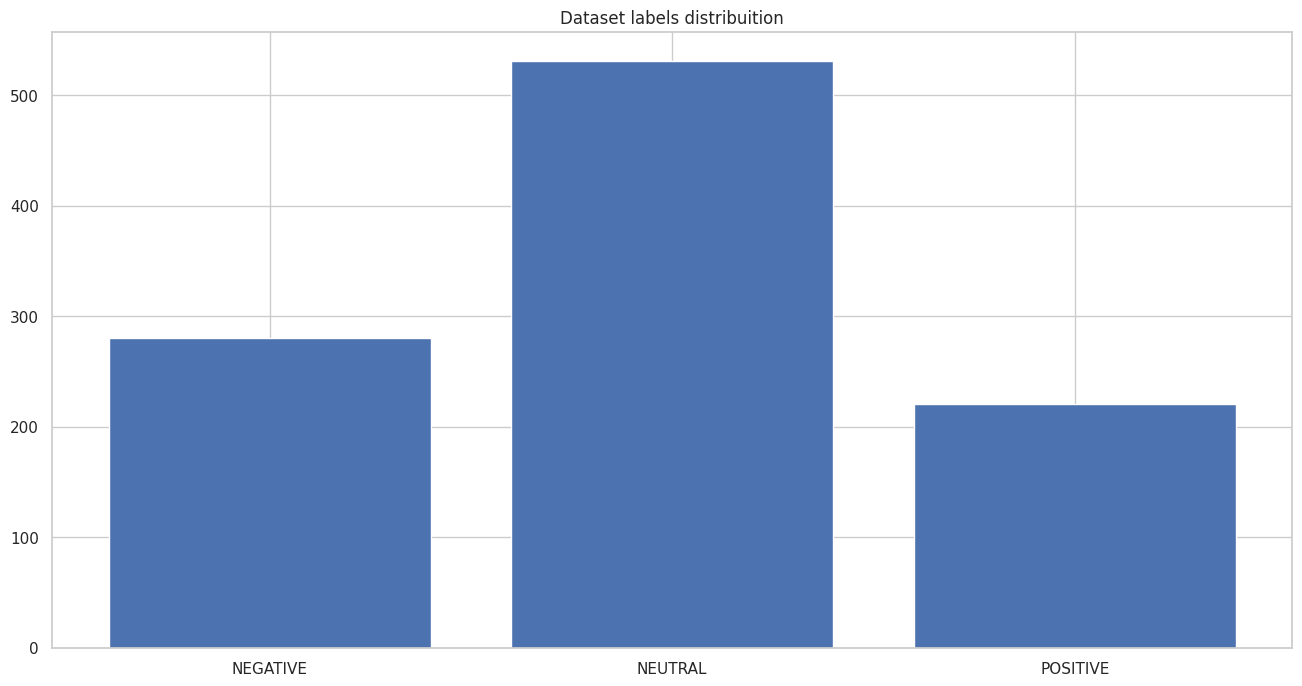

In [ ]:
target_cnt = Counter(df.new_target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
df.to_excel("/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/Comment_process.xlsx")

In [ ]:
#df.to_csv("/content/drive/MyDrive/Mercantil/modelos_analisis_de_sentimiento/Insta_comment_process.csv")